#Dhermendra Kumar Tiwari
#Task-16
#GO_STP_3831

In [3]:
pip install scikit-plot

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

In [5]:
df=pd.read_csv('train.csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.shape

(891, 12)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


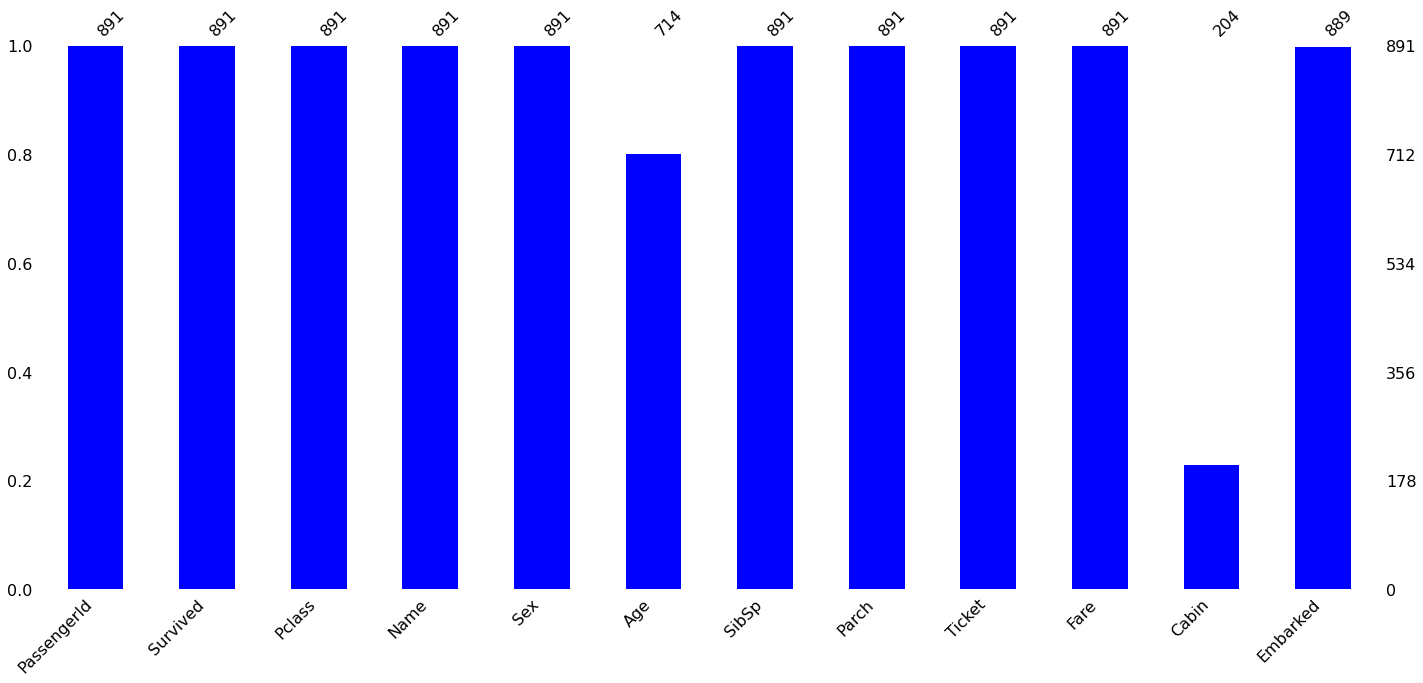

In [16]:
import missingno as no
no.bar(df,color='blue')
plt.show()

In [17]:
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
6,SibSp,0,0.000000
7,Parch,0,0.000000


In [18]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

In [19]:
df.drop(columns='Cabin' , inplace=True)

In [20]:
df.dropna(subset=['Embarked'],inplace=True)

In [21]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
df.shape

(889, 11)

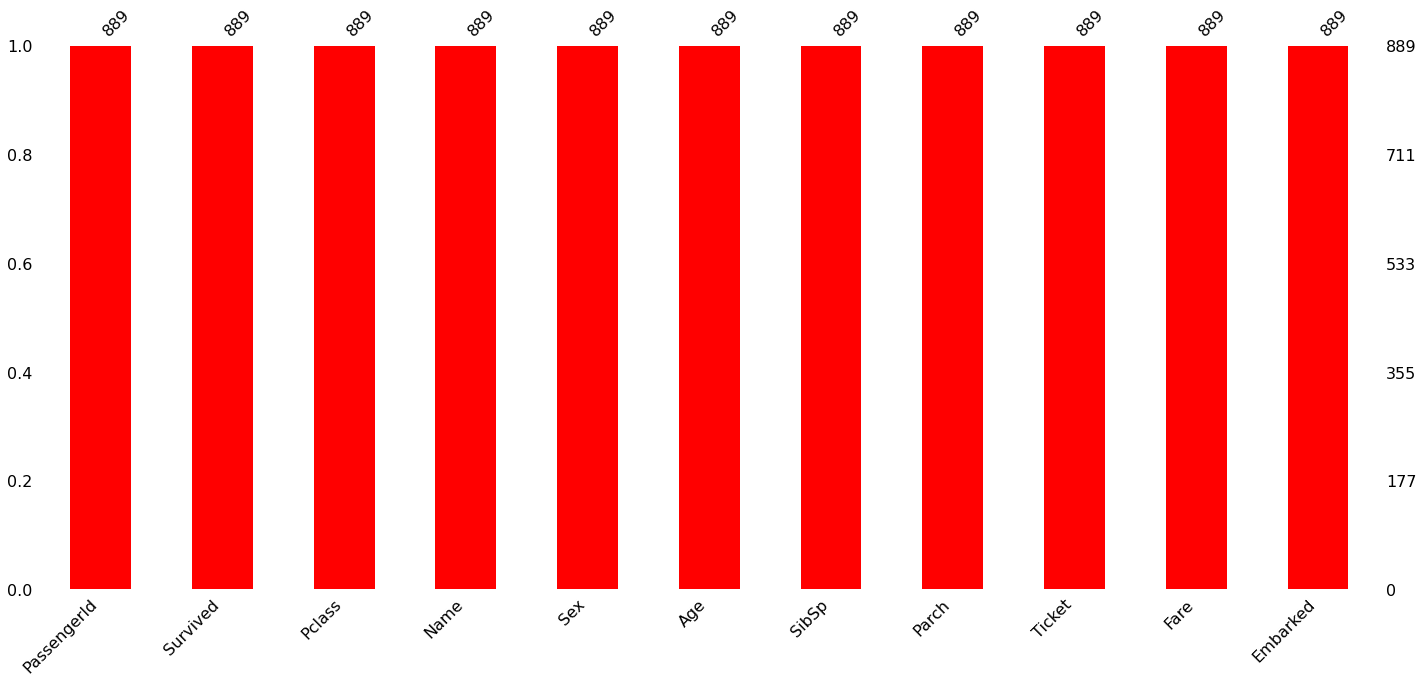

In [24]:
no.bar(df,color='red')

In [26]:
pip install pingouin

     |████████████████████████████████| 215kB 15.7MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-cp37-none-any.whl size=204754 sha256=3e3d3a818b66845f121448ae4da1ae2b6b8302499756cbef68900d289225a818
  Stored in directory: /root/.cache/pip/wheels/d6/36/7e/ae23fc9845091efd9228b36f93b306a67c40bdc2195b280748
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7050 sha256=a3cec6561440b51f44dedbd7346b18c4f0fc27a51c259533070b7908665fab5d
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [27]:
import pingouin as pg

In [29]:
def plot_num(a):
  fig,axes=plt.subplots(3,2,figsize=(10,12))
  sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
  pg.qqplot(df[a],dist='norm',ax=axes[0][1])
  sns.barplot(x=df.Survived,y=df[a],ax=axes[1][0],palette='Pastel1')
  sns.stripplot(x=df.Survived,y=df[a],ax=axes[1][1],palette='Pastel1')
  sns.boxplot(y=df[a],x=df.Survived,hue='Survived',data=df,ax=axes[2][0],palette='Pastel1')
  pg.plot_blandaltman(x=df.Survived, y=df[a],ax=axes[2][1])
  plt.suptitle(a.title())
  plt.show()

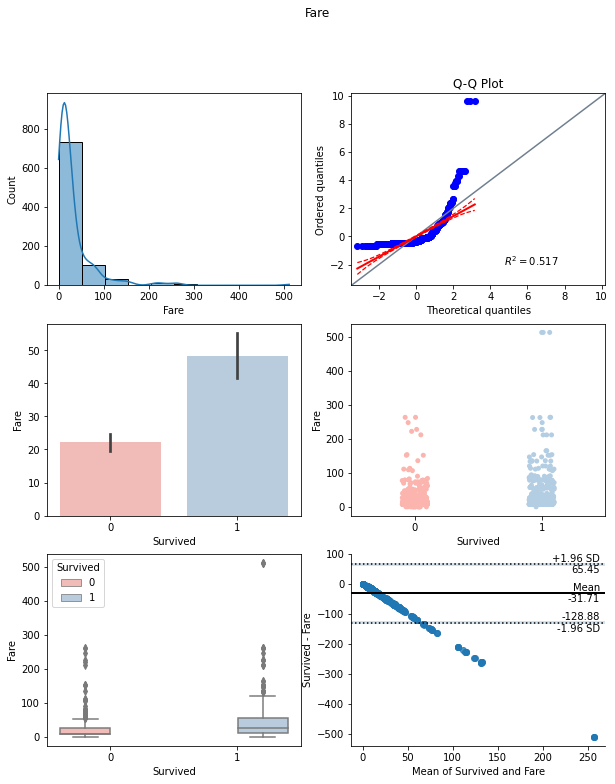

In [30]:
plot_num('Fare')

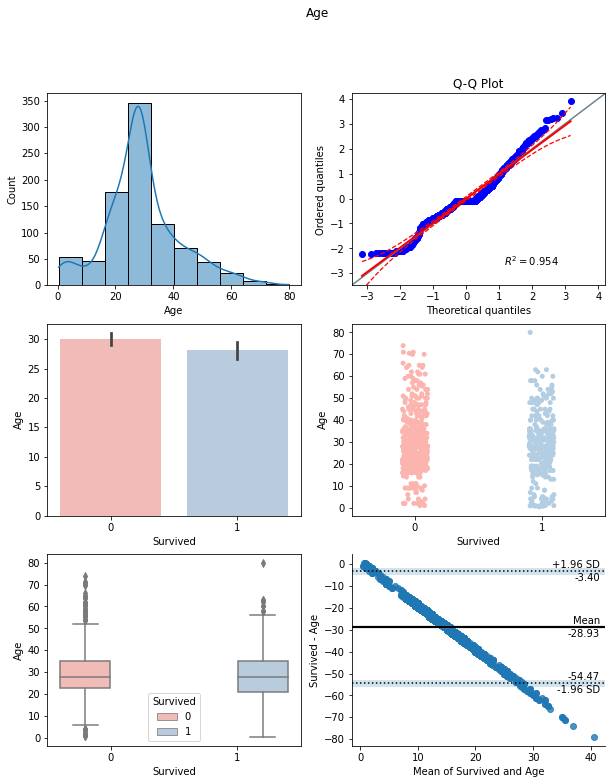

In [31]:
plot_num('Age')

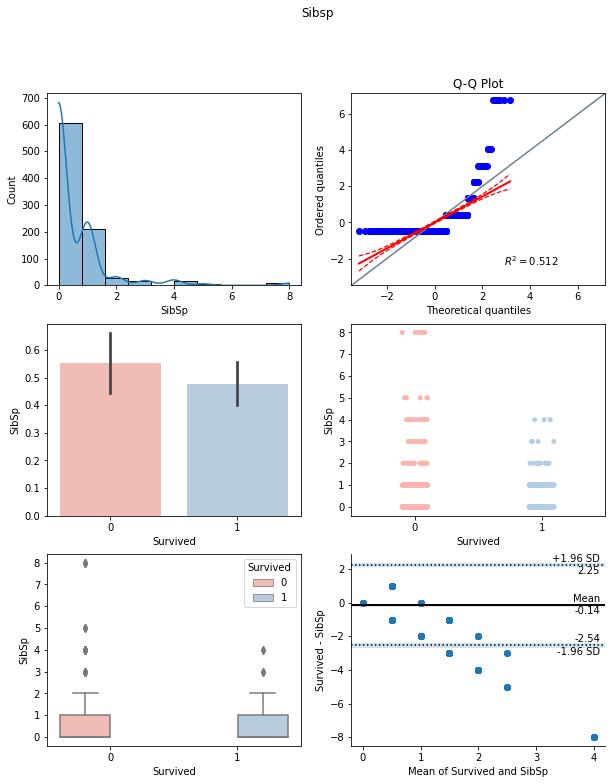

In [32]:
plot_num('SibSp')

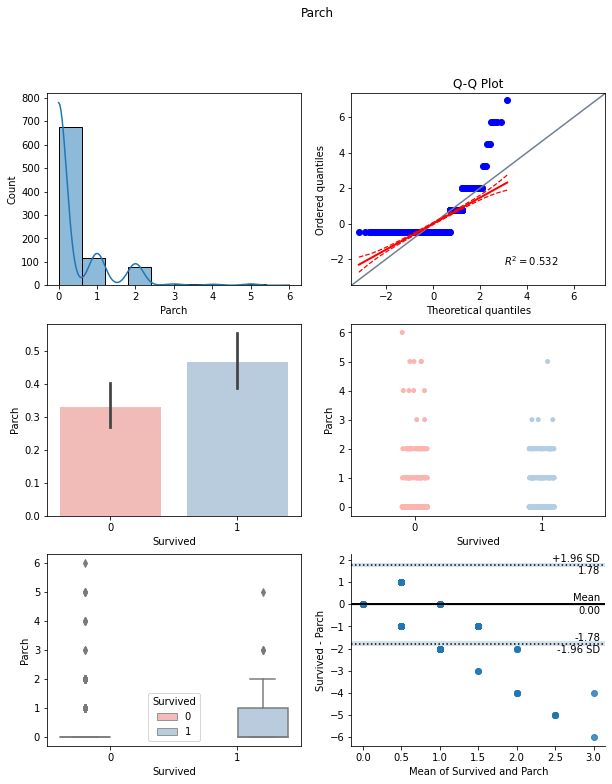

In [33]:
plot_num('Parch')

In [34]:
def plot_cat(a):
  fig,axes=plt.subplots(2,2,figsize=(10,12))
  df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,startangle = 180,autopct='%.0f%%',ax=axes[0][0])
  df[a].value_counts().plot.bar(ax=axes[0][1])
  sns.scatterplot(x=df.Fare ,y=df.Age,hue=df[a],ax=axes[1][0],palette='Pastel1')
  sns.stripplot(x=df[a],y=df.Fare,hue=df.Survived,ax=axes[1][1],palette='Pastel1')
  fig.suptitle("Count of"+a.title())
  plt.show()

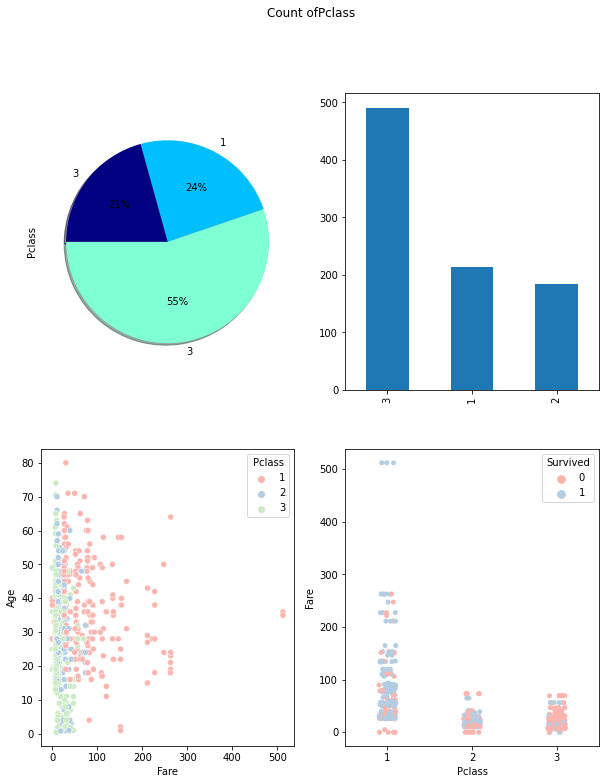

In [35]:
plot_cat('Pclass')

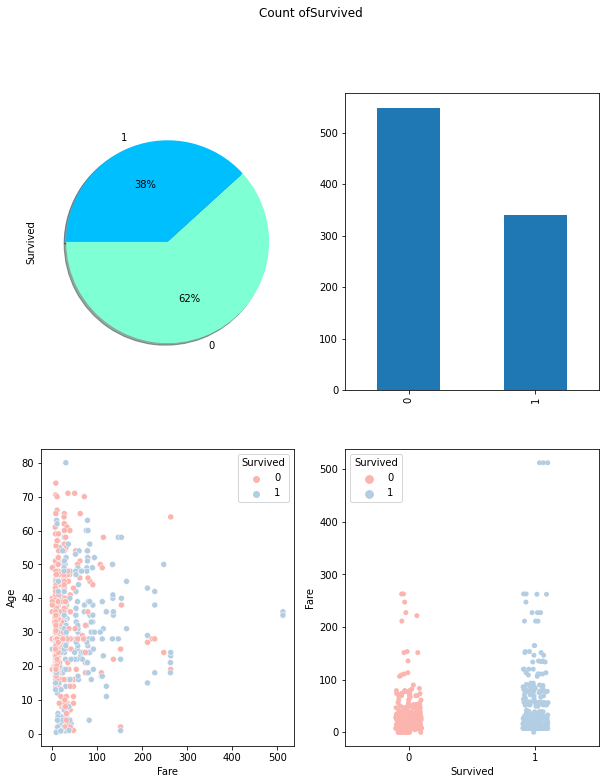

In [36]:
plot_cat('Survived')

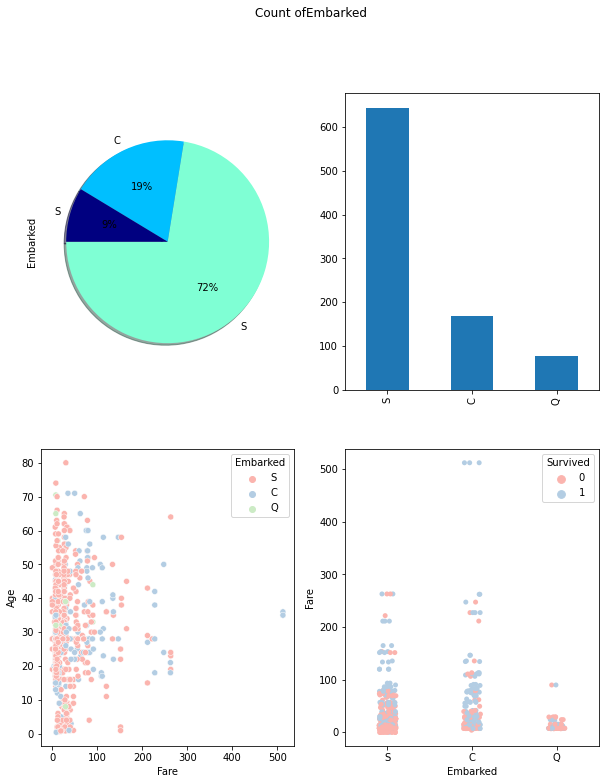

In [37]:
plot_cat('Embarked')

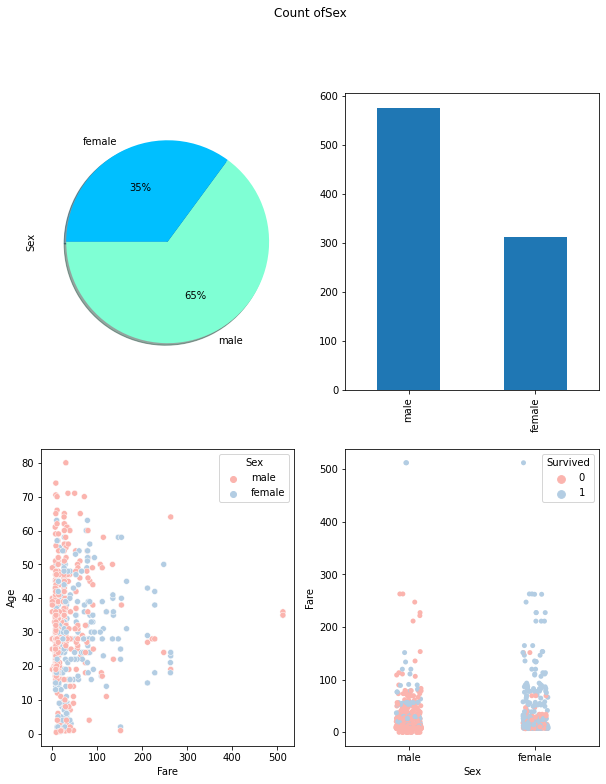

In [38]:
plot_cat('Sex')

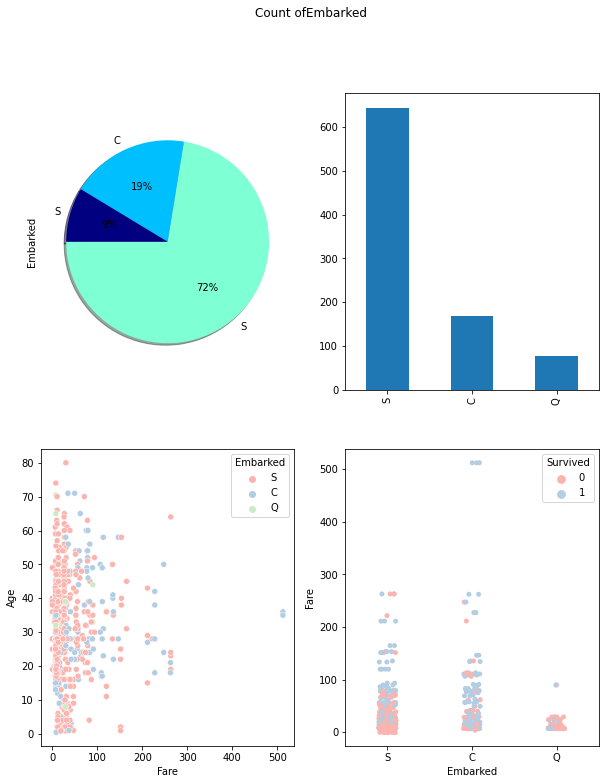

In [39]:
plot_cat('Embarked')

In [40]:
def plot_kde(a):
  facet=sns.FacetGrid(df,hue='Survived',aspect=4,palette='PuBu')
  facet.map(sns.kdeplot,a,shade=True)
  facet.set(xlim=(0,df[a].max()))
  plt.title(a.title())
  plt.show()

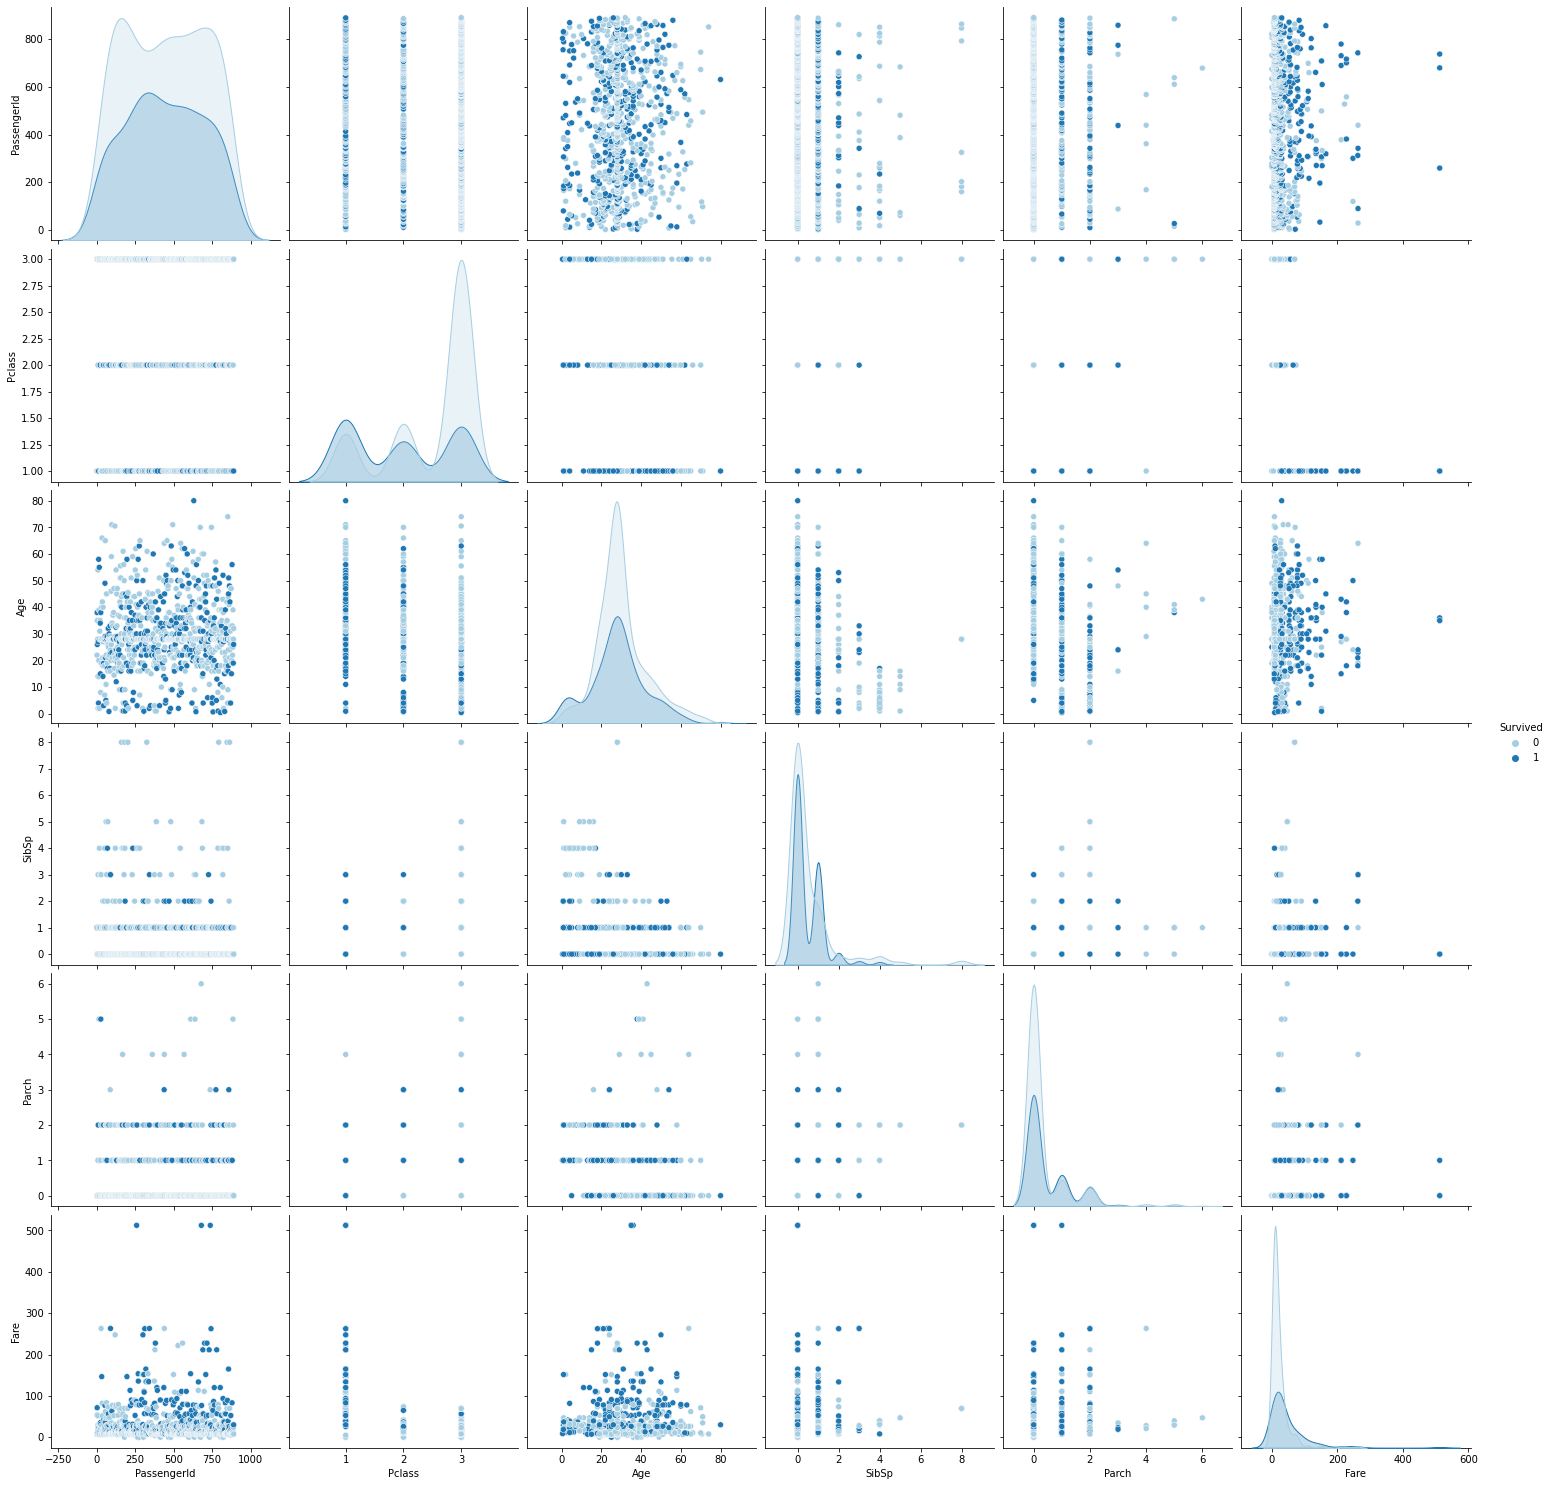

In [41]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Survived',height=3.5)
plt.show()

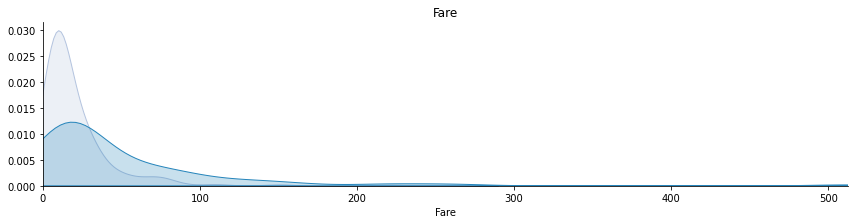

In [42]:
plot_kde('Fare')

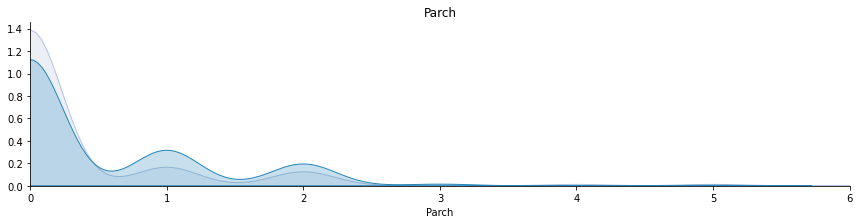

In [43]:
plot_kde('Parch')

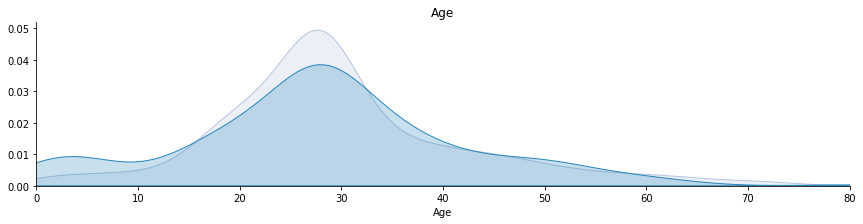

In [44]:
plot_kde('Age')

In [45]:
import yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [46]:
df.Sex =label_Enc.fit_transform(df.Sex)

In [47]:



label_Enc.classes_


array(['female', 'male'], dtype=object)

In [49]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C


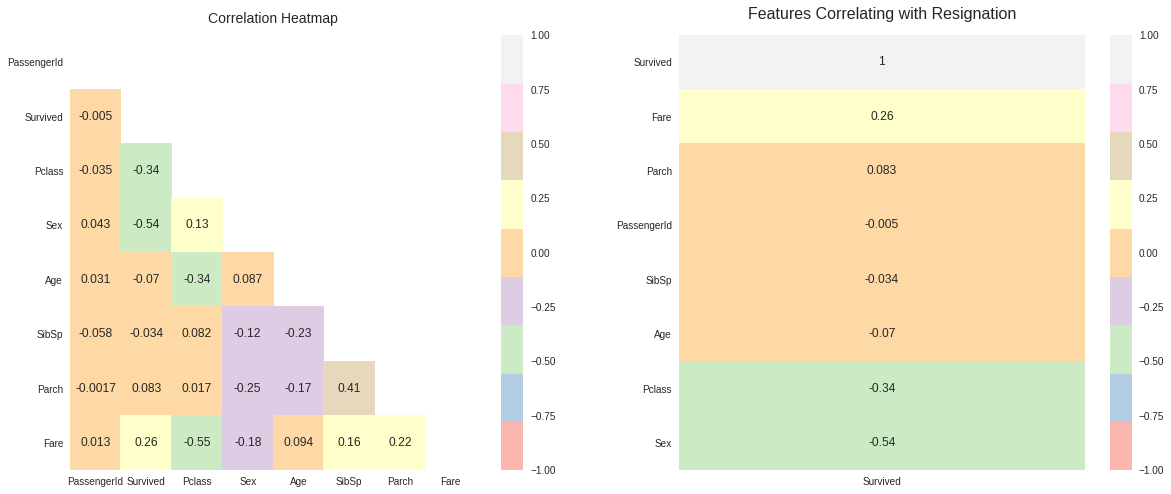

In [52]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Survived']].sort_values(by='Survived',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

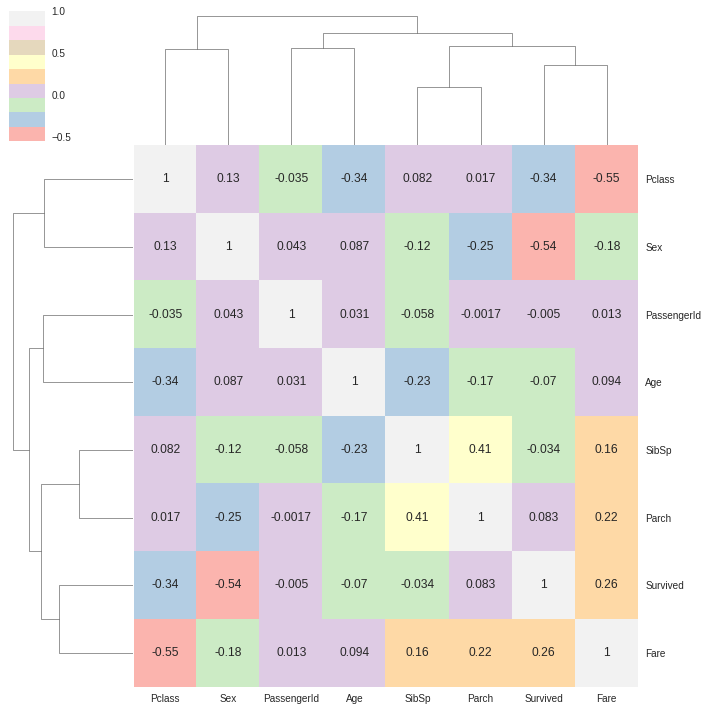

In [53]:
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')

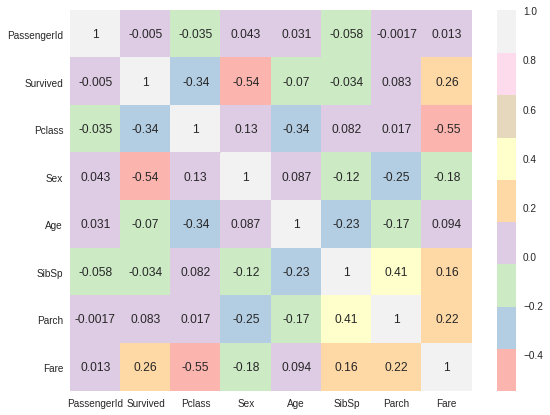

In [54]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()


In [55]:
X=df.drop(['Survived','Name','Ticket','Embarked'],axis=1)
y=df['Survived']

In [56]:

X[:5]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


In [57]:
y[:8]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
Name: Survived, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb_clf=GaussianNB()

In [62]:
gnb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_pred = gnb_clf.predict(X_test)

In [64]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7921348314606742


In [65]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.7058823529411765


In [66]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.7384615384615385


In [67]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.7218045112781954


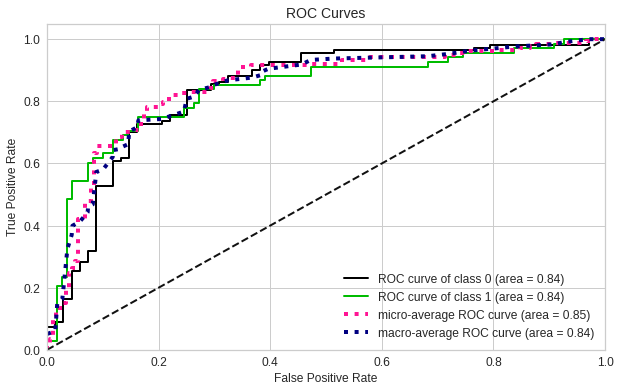

In [69]:
y_probas = gnb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

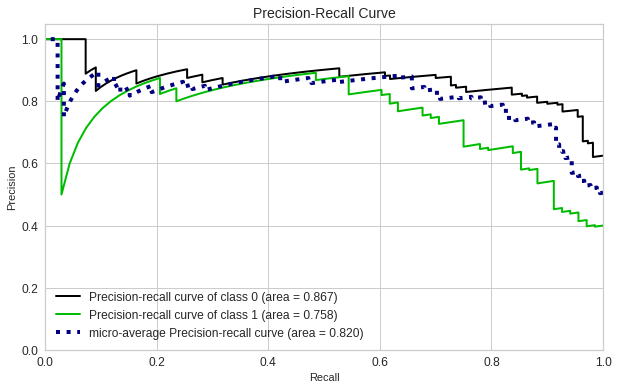

In [70]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

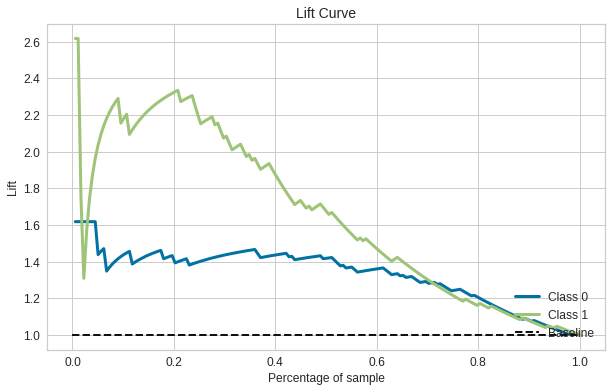

In [71]:
skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

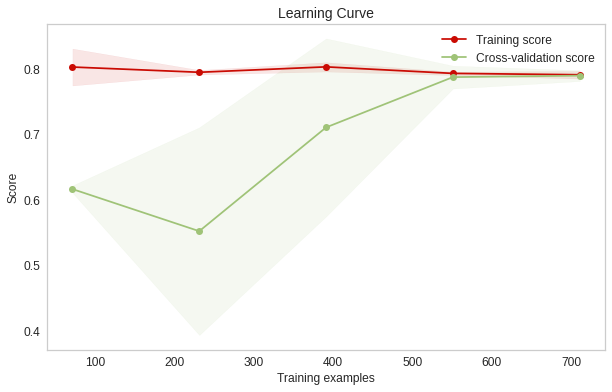

In [72]:
skplt.estimators.plot_learning_curve(gnb_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

In [73]:
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [20, 48]])

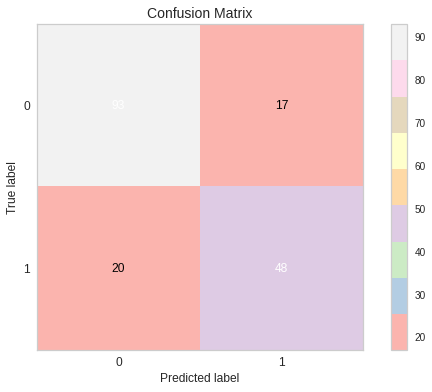

In [74]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [77]:
pip install yellowbrick

In [80]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [81]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [82]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line_color='blue',
        dimensions = list([
            dict(range = [1,5],
                 constraintrange = [1,2], # change this range by dragging the pink line
                 label = 'A', values = [1,4]),
            dict(range = [1.5,5],
                 tickvals = [1.5,3,4.5],
                 label = 'B', values = [3,1.5]),
            dict(range = [1,5],
                 tickvals = [1,2,4,5],
                 label = 'C', values = [2,4],
                 ticktext = ['text 1', 'text 2', 'text 3', 'text 4']),
            dict(range = [1,5],
                 label = 'D', values = [4,2])
        ])
    )
)
fig.show()

In [83]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/iris.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['species_id'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = df['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = df['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = df['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = df['petal_width'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [84]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = "Block Height", values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            dict(range = [9,19984],
                 label = 'Assembly Penalty Wt', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW'])])
    )
)
fig.show()